# MEI Introduction to Data Science

# Lesson 3 - Activity 2

# Table of Contents
* [Introduction](#Introduction)
 * [Problem](#Problem)
 * [Importing the libraries and data](#Importing-the-libraries-and-data)
* [Exploring the data](#Exploring-the-data)
 * [Checkpoint 1](#Checkpoint-1)
* [Analysing the data](#Analysing-the-data)
 * [Plotting scatter diagrams](#Plotting-scatter-diagrams)
 * [Checkpoint 2](#Checkpoint-2)
 * [Adding a third categorical feature](#Adding-a-third-categorical-variable-to-a-scatter-diagram)
 * [Checkpoint 3](#Checkpoint-3)
 * [Adding a third numerical feature](#Adding-a-third-numerical-variable-to-a-scatter-diagram)
 * [Checkpoint 4](#Checkpoint-4)
 * [Hexagonal bin plots](#Hexagonal-bin-plots)
 * [Exploring the association between other variables and life expectancy](Exploring-the-association-between-other-variables-and-life-expectancy)
* [Communicating the result](#Communicating-the-result)
 * [Checkpoint 5](#Checkpoint-5)
 
# Introduction 
This activity uses the Seaborn library in Python to create 2-dimensional charts for data, such as scatter plots: these are charts that feature two numerical variables. You should have met scatter plots before but you will also see how to add an additional third variable to them. More information about Seaborn can be seen at: https://seaborn.pydata.org/

The activity uses the data from the MEI large data set (number 4) which gives *demographic* information about countries. For more information about the data see the short video at: https://mei.org.uk/introduction-to-data-science/large-data-sets/

## Problem

***Which features of countries are associated with longer life expectancy?***

To answer this you could create scatter plots to explore the links between other variables and life expectancy.

## Importing the libraries and data

> Run the code box below to import the libraries.

In [1]:
import pandas as pd
import seaborn as sns

#import the data and check by viewing the first few rows
countries_data = pd.read_csv('../input/meilds4/mei-lds-4.csv')
countries_data.head()

,no,Country,Region,population,birth rate per 1000,death rate per 1000,median age,labor force,unemployment (%),GDP per capita (US$),physician density (physicians/1000 population),Health expenditure (% of GDP),Total area,Land borders,Life expectancy at birth 1960,Life expectancy at birth 1970,Life expectancy at birth 1980,Life expectancy at birth 1990,Life expectancy at birth 2000,Life expectancy at birth 2010
0,1,Algeria,"Africa, N",41657488,21.5,4.3,28.3,11820000.0,11.7,15200.0,1.83,7.2,2381740,Yes,46.14,50.37,58.20,66.73,70.29,74.68
1,2,Egypt,"Africa, N",99413317,28.8,4.5,23.9,29950000.0,12.2,12700.0,0.79,5.6,1001450,Yes,48.06,52.16,58.34,64.58,68.61,70.36
2,3,Libya,"Africa, N",6754507,17.2,3.7,29.4,1114000.0,30.0,9600.0,2.16,5.0,1759540,Yes,42.61,56.05,64.19,68.52,70.47,71.64
3,4,Morocco,"Africa, N",34314130,17.5,4.9,29.7,12000000.0,10.2,8600.0,0.73,5.9,446550,Yes,48.46,52.57,57.56,64.73,68.72,74.00
4,5,Sudan,"Africa, N",43120843,34.2,6.7,17.9,11920000.0,19.6,4300.0,0.41,8.4,1861484,Yes,48.19,52.23,54.25,55.50,58.43,62.62


# Exploring the data
You can explore the data by finding the shape of the data set with `shape` and displaying the data types with `info()`.

> Run the next two code cells to:
> * find the number of rows and columns in the data;
> * show the data types of the columns.

In [2]:
# the number of rows and columns
countries_data.shape

(236, 20)

In [3]:
# the data types
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   no                                              236 non-null    int64  
 1   Country                                         236 non-null    object 
 2   Region                                          236 non-null    object 
 3   population                                      236 non-null    int64  
 4   birth rate per 1000                             226 non-null    float64
 5   death rate per 1000                             226 non-null    float64
 6   median age                                      228 non-null    float64
 7   labor force                                     231 non-null    float64
 8   unemployment (%)                                218 non-null    float64
 9   GDP per capita (US$)                       

You can use `describe()` to explore the values of `life expectancy at birth 2010`.

> Run the code below to display some statistics about life expectancy.

In [4]:
# calculate statistics for Life expectancy at birth 2010
countries_data['Life expectancy at birth 2010'].describe()

count    198.000000
mean      70.431061
std        8.657523
min       47.560000
25%       64.755000
50%       72.835000
75%       76.562500
max       82.980000
Name: Life expectancy at birth 2010, dtype: float64

> Add and run code below to calculate statistics for
> * `Life expectancy at birth 1960`
> * `birth rate per 1000`

In [5]:
# calculate statistics for Life expectancy at birth 1960
countries_data['Life expectancy at birth 1960'].describe()

count    188.000000
mean      53.800638
std       12.119318
min       28.200000
25%       43.640000
50%       54.585000
75%       64.445000
max       73.550000
Name: Life expectancy at birth 1960, dtype: float64

In [6]:
# calculate statistics for birth rate per 1000
countries_data['birth rate per 1000'].describe()

count    226.000000
mean      18.816372
std        9.345047
min        6.500000
25%       11.600000
50%       15.850000
75%       23.475000
max       43.700000
Name: birth rate per 1000, dtype: float64

It is useful to have visual representation of life expectancy as a single variable before looking for an association with other variables.

> Run the code below to view boxplots of life expectancy for 2010 by region.

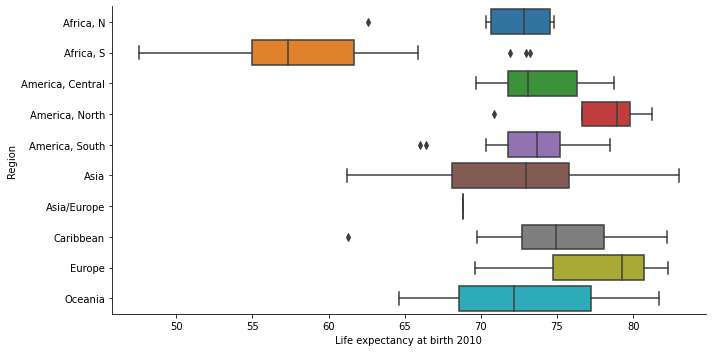

In [7]:
# create box plots of life expectancy in 2010, grouped by region
sns.catplot(data=countries_data, kind='box', x='Life expectancy at birth 2010', y='Region', aspect=2);

> Add and run code below to create box plots grouped by region for`birth rate per 1000`.


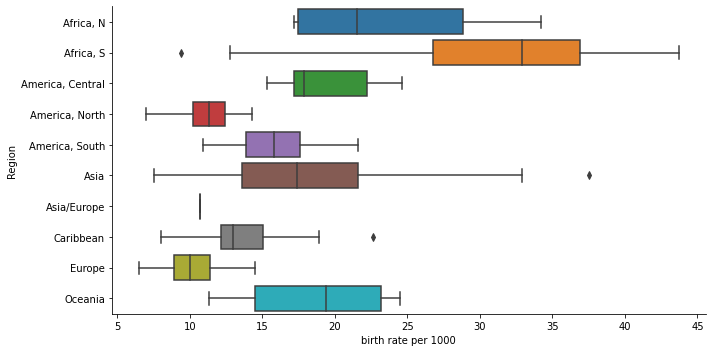

In [8]:
# create box plots of birth rate, grouped by region
sns.catplot(data=countries_data, kind='box', x='birth rate per 1000', y='Region', aspect=2);

## Checkpoint 1

> * Which region has the highest median life expectancy?
> * Which region has the largest variation in life expectancy?
> * Which regions have the lowest birth rates? Which regions have the highest birth rates?

# Analysing the data

## Plotting scatter diagrams

You are probably used to drawing scatter diagrams to look for association between two variables. You can use Seaborn's `relplot()` (relational plot) command to create a scatter diagram. The format of the `relplot()` command should look very similar to `catplot()` and `displot()`.

> Run the code below to draw a scatter diagram of `Life expectancy at birth 2010` against `GDP per capita (US$)`.

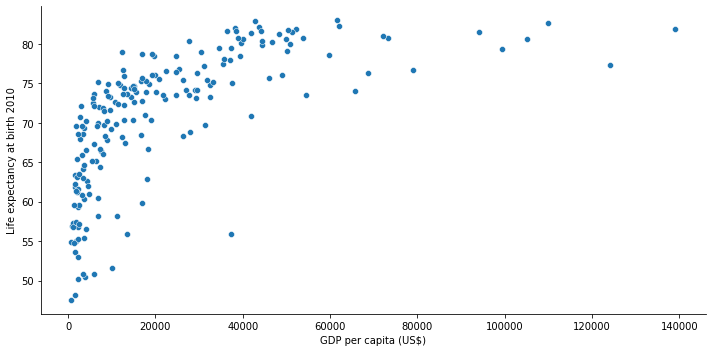

In [9]:
# create a scatter plot of life expectancy against GDP
sns.relplot(data=countries_data, x='GDP per capita (US$)', y='Life expectancy at birth 2010', aspect=2);

> Add and run code below to:
> * Create a scatter plot of life expectancy against unemployment;
> * Create a scatter plot of life expectancy against birth rate.

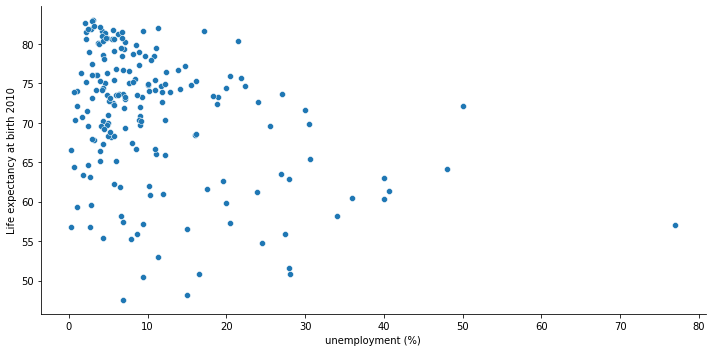

In [10]:
# create a scatter plot of life expectancy against unemployment
sns.relplot(data=countries_data, x='unemployment (%)', y='Life expectancy at birth 2010', aspect=2);

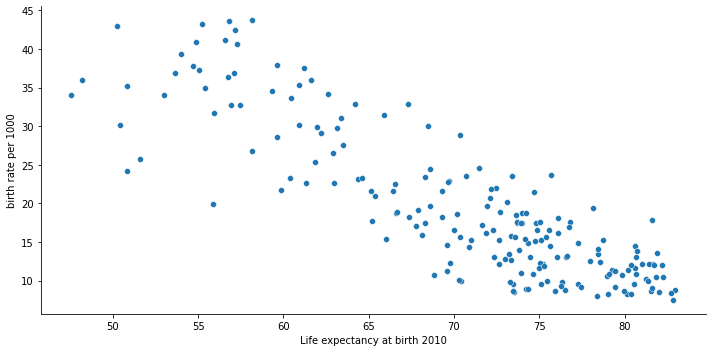

In [11]:
# create a scatter plot of life expectancy against birth rate
sns.relplot(data=countries_data, x='Life expectancy at birth 2010', y='birth rate per 1000', aspect=2);

## Checkpoint 2

> * Do countries with higher GDP have longer life expectancy on average?
> * Describe how life expectancy changes as GDP increases.
> * Is there a strong association between unemployment rate and life expectancy?
> * Describe how life expectancy changes as birth rate increases.

## Adding a third categorical variable to a scatter diagram

You can also format the colour of points in a scatter diagram based on a third categorical value.

> Run the code below to create a scatter plot of life expectancy against GDP, colour-coded by region

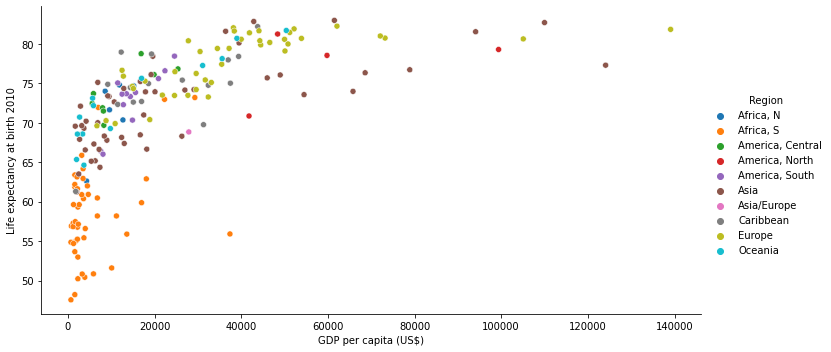

In [12]:
# create a scatter plot of life expectancy against GDP, colour-coded by region
sns.relplot(data=countries_data, x='GDP per capita (US$)', y='Life expectancy at birth 2010', hue='Region', aspect=2);

> Add and run code below to create a scatter plot of life expectancy against birth rate, colour-coded by region

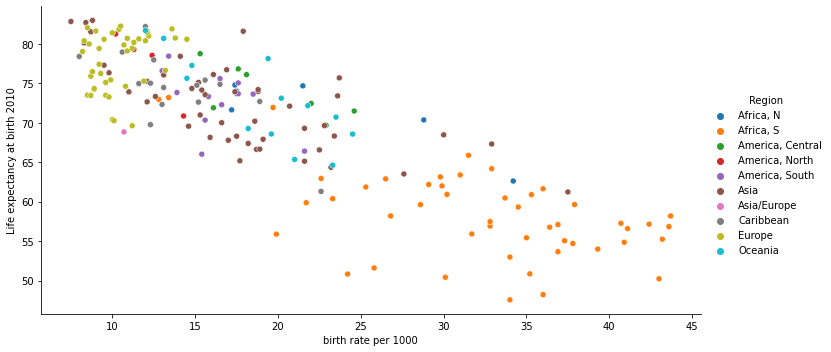

In [13]:
# create a scatter plot of life expectancy against birth rate, colour-coded by region
sns.relplot(data=countries_data, x='birth rate per 1000', y='Life expectancy at birth 2010', hue='Region', aspect=2);

## Checkpoint 3

> Describe any differences in the association between GDP and life expectancy and between birth rate and life expectancy in different regions.

## Adding a third numerical variable to a scatter diagram

A useful feature of scatter diagrams in Seaborn is the ability to format the points based on a third variable. You can assign the a numerical variable to the `size` of the points.

> Run the code below to plot a scatter diagram where the size of the points represents `physician density (physicians/1000 population)`.

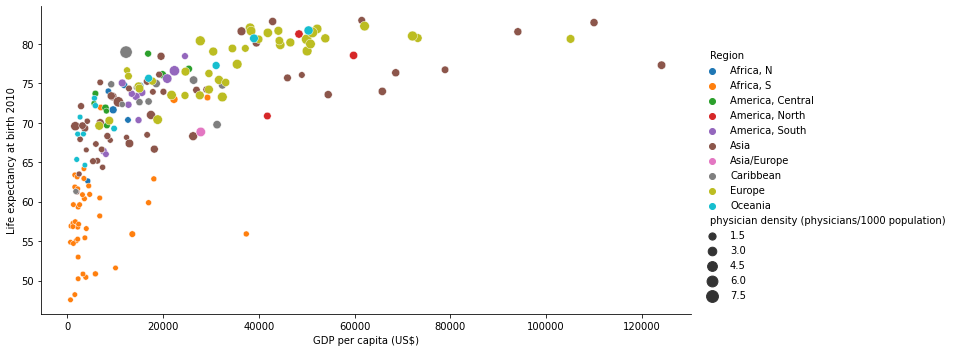

In [14]:
# create a scatter plot of life expectancy against GDP, where the size is determined by physicians per 1000
# sizes=(30,150) sets the range of sizes to be used
sns.relplot(data=countries_data, x='GDP per capita (US$)', y='Life expectancy at birth 2010', size='physician density (physicians/1000 population)', hue='Region', sizes=(30, 150), aspect=2);

> Add and run code below to create a scatter diagram of life expectancy against birth rate, with size determined by GDP

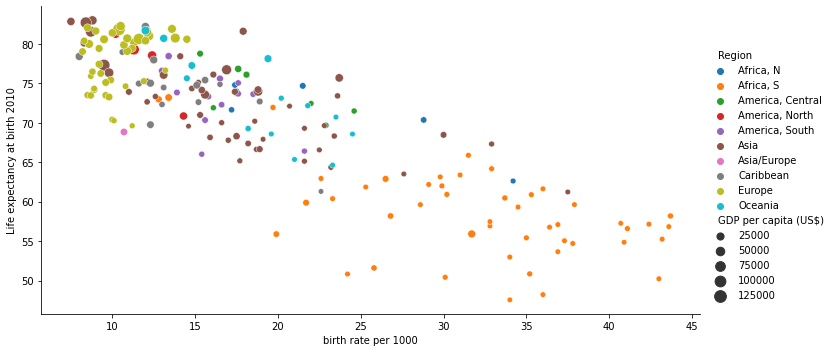

In [15]:
# create a scatter plot of life expectancy against birth rate, with size determined by GDP
sns.relplot(data=countries_data, x='birth rate per 1000', y='Life expectancy at birth 2010', size='GDP per capita (US$)', hue='Region', sizes=(30, 150), aspect=2);

## Checkpoint 4

> * How are GDP and physician density collectively linked to life expectancy?
> * Which countries have a long life expectancy but a relatively low GDP? Try filtering the data to work this out.

## Hexagonal bin plots

When you have a very large data set, with thousands or even millions of data points, scatter plots can be misleading. This is because the points start landing on top of each other, making it hard to tell if there are many points in an area or just a few. To solve this, some charts 'bin' the data first, in much the same way a histogram does. Unlike a histogram, a bin plot shows density using shading with colours representing higher densities.

Seaborn can create a bin plot using its `jointplot` function, which also provides histograms of the two variables.

> Run the code below to create a hexagonal bin plot of life expectancy against GDP

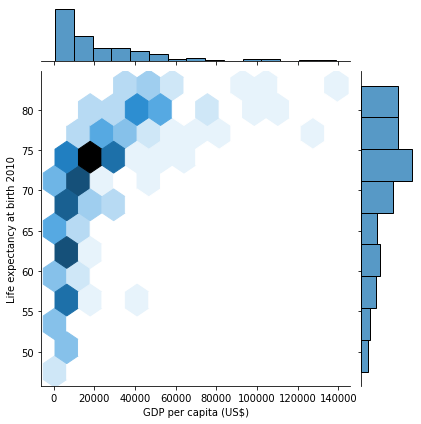

In [16]:
# create a hexagonal bin plot
sns.jointplot(data=countries_data, kind='hex', x='GDP per capita (US$)', y='Life expectancy at birth 2010');

> Add code below to create a hexagonal bin plot of life expectancy against physician density.

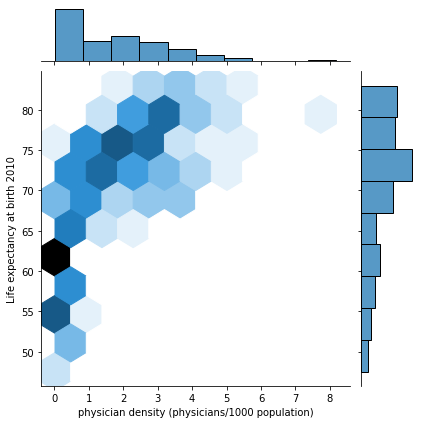

In [17]:
# create a hexagonal bin plot
sns.jointplot(data=countries_data, kind='hex', x='physician density (physicians/1000 population)', y='Life expectancy at birth 2010');

## Exploring the association between other variables and life expectancy
> * Add code below to explore the association betweeen other variables and life expectancy, using `hue` or `size` to add a third variable as appropriate.
> * You can create additional code boxes using the **+ Code** button.

In [29]:
# create a scatter plot
# Hue and size don't seem to work with the jointplot function? 

# Communicating the result
## Checkpoint 5

> Use your analysis to answer the problem: ***Which features of countries are associated with longer life expectancy?***